In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [5]:
df = pd.read_csv('C:/Users/spruh/Desktop/city_day.csv/city_day.csv') #Reading the data
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [6]:
for col in df.columns.values:                  #Number of unique values in each column
    list_vals = pd.unique(df[col])
    print(col + ' : ' + str(len(list_vals)))

City : 26
Date : 2009
PM2.5 : 11717
PM10 : 12572
NO : 5777
NO2 : 7405
NOx : 8157
NH3 : 5923
CO : 1780
SO2 : 4762
O3 : 7700
Benzene : 1874
Toluene : 3609
Xylene : 1562
AQI : 830
AQI_Bucket : 7


In [7]:
print(df.dtypes) 
df.info()

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  

In [8]:
df.dropna()
print(df.head())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [9]:
df.dropna(axis='index',inplace=True) #drop rows having NaN values
df.replace('zero',0,inplace=True) #replaces any instances of 'zero' by 0
print(df.head())

           City        Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
2123  Amaravati  2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2124  Amaravati  2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14   
2125  Amaravati  2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11   
2126  Amaravati  2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42  0.09   
2127  Amaravati  2017-11-29  72.47  114.84  5.23  23.20  16.59  12.25  0.16   

        SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
2123  15.24  127.09     0.20     6.50    0.06  184.0   Moderate  
2124  26.96  117.44     0.22     7.95    0.08  197.0   Moderate  
2125  33.59  111.81     0.29     7.63    0.12  198.0   Moderate  
2126  19.00  138.18     0.17     5.02    0.07  188.0   Moderate  
2127  10.55  109.74     0.21     4.71    0.08  173.0   Moderate  


In [10]:

df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

           City       Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
2123  Amaravati 2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2124  Amaravati 2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14   
2125  Amaravati 2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11   
2126  Amaravati 2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42  0.09   
2127  Amaravati 2017-11-29  72.47  114.84  5.23  23.20  16.59  12.25  0.16   

        SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
2123  15.24  127.09     0.20     6.50    0.06  184.0   Moderate  
2124  26.96  117.44     0.22     7.95    0.08  197.0   Moderate  
2125  33.59  111.81     0.29     7.63    0.12  198.0   Moderate  
2126  19.00  138.18     0.17     5.02    0.07  188.0   Moderate  
2127  10.55  109.74     0.21     4.71    0.08  173.0   Moderate  


In [11]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000
mean,61.327365,123.418321,17.015191,31.708190,32.448956,20.737070,0.984344,11.514426,36.127691,3.700361,10.323696,2.557439,140.510103
std,53.709682,85.791491,20.037836,18.784041,27.388129,16.088215,1.356161,7.166113,19.553695,5.062159,12.287223,4.535060,92.738826
min,2.000000,7.800000,0.250000,0.170000,0.170000,0.120000,0.000000,0.710000,1.550000,0.000000,0.000000,0.000000,23.000000
25%,27.927500,66.970000,5.080000,15.977500,14.547500,10.390000,0.490000,6.557500,22.357500,0.910000,2.210000,0.300000,78.000000
50%,47.490000,103.010000,10.060000,28.900000,24.285000,14.690000,0.730000,9.875000,32.540000,2.435000,6.310000,1.250000,112.000000
75%,73.442500,150.770000,19.392500,43.632500,39.622500,28.545000,1.060000,14.430000,45.512500,4.620000,13.040000,3.030000,166.000000
max,639.190000,796.880000,159.220000,140.170000,224.090000,166.700000,16.230000,70.390000,162.330000,64.440000,103.000000,125.180000,677.000000


In [12]:
x = df.groupby("City").mean()
x

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
City,,,,,,,,,,,,,
Amaravati,41.713220,81.809876,4.576610,23.754613,16.319598,12.291161,0.611238,15.021176,39.535217,0.586981,2.200820,0.813638,101.500000
Amritsar,56.421509,119.936321,20.506840,19.048176,36.774607,14.514560,0.730912,9.388129,24.496635,3.975896,3.245991,6.901258,129.169811
Chandigarh,39.489783,83.123466,10.427040,12.031191,15.267762,32.467112,0.619061,10.126173,19.838051,4.617437,1.258014,2.114007,93.241877
Delhi,117.134755,223.165678,33.265458,44.428742,54.032925,41.529518,2.185964,13.948154,44.382949,3.669469,21.834600,1.442696,251.832516
Gurugram,49.541008,113.500672,7.842941,17.376891,15.327479,26.094454,0.766134,10.596975,60.893193,4.942521,3.936639,5.722437,127.966387
Hyderabad,46.038925,91.945371,7.323047,31.059815,18.717948,16.172781,0.545952,9.654258,35.514845,1.279320,8.465797,1.852651,104.864648
Kolkata,47.606294,93.489772,21.381472,29.197614,49.215812,17.316294,0.687157,8.197487,32.778832,15.857640,19.801218,2.566294,113.979695
Patna,65.831257,126.747958,55.025393,34.156073,67.406649,18.371518,1.156911,8.596387,24.641361,2.043665,5.038429,1.885497,169.356021
Visakhapatnam,47.372246,106.993775,13.073855,37.319567,29.778780,11.242370,0.853510,12.819266,37.154845,4.509973,9.627082,3.211432,116.954023


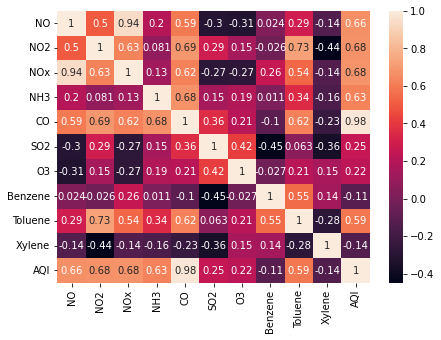

In [13]:
fig, ax = plt.subplots(figsize=(7, 5))
contvar = ['NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene', 'Xylene', 'AQI']
sns.heatmap(x[contvar].corr(),annot=True)
plt.show()

<BarContainer object of 6236 artists>

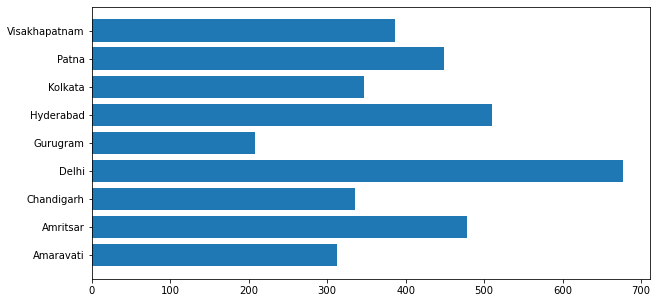

In [27]:
city = df['City']
aqi = df['AQI']
fig, ax = plt.subplots(figsize =(10, 5))
ax.barh(city, aqi)

<BarContainer object of 6236 artists>

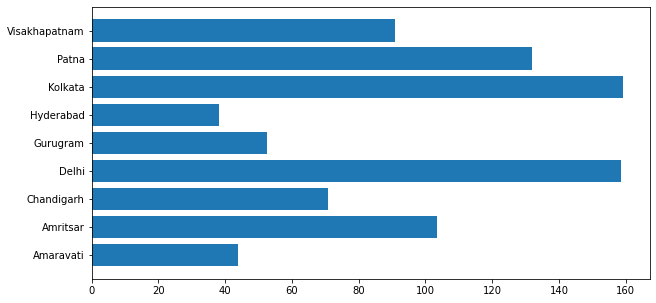

In [28]:
city = df['City']
no = df['NO']
fig, ax = plt.subplots(figsize =(10, 5))
ax.barh(city, no)

In [15]:
y = df.groupby("Date").mean()
y

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,
2015-01-01,313.220000,607.980000,69.160000,36.390000,110.590000,33.850000,15.200000,9.250000,41.680000,14.360000,24.860000,9.840000,472.000000
2015-01-02,186.180000,269.550000,62.090000,32.870000,88.140000,31.830000,9.540000,6.650000,29.970000,10.550000,20.090000,4.290000,454.000000
2015-01-03,87.180000,131.900000,25.730000,30.310000,47.950000,69.550000,10.610000,2.650000,19.710000,3.910000,10.230000,1.990000,143.000000
2015-01-04,151.840000,241.840000,25.010000,36.910000,48.620000,130.360000,11.540000,4.630000,25.360000,4.260000,9.710000,3.340000,319.000000
2015-01-05,146.600000,219.130000,14.010000,34.920000,38.250000,122.880000,9.200000,3.330000,23.200000,2.800000,6.210000,2.960000,325.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,25.197500,73.858750,5.611250,15.348750,13.772500,15.322500,0.553750,8.003750,26.195000,1.611250,7.312500,1.182500,69.375000
2020-06-28,32.842222,101.077778,9.871111,16.025556,17.444444,14.734444,0.574444,8.511111,25.801111,1.466667,5.908889,2.081111,88.888889
2020-06-29,28.143333,78.371111,11.068889,18.011111,20.232222,17.012222,0.585556,8.833333,28.655556,1.744444,6.141111,2.257778,90.222222
